# Standardization

Standardization or Z-Score Normalization is one of the feature scaling techniques , here the transformation of features is done  by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

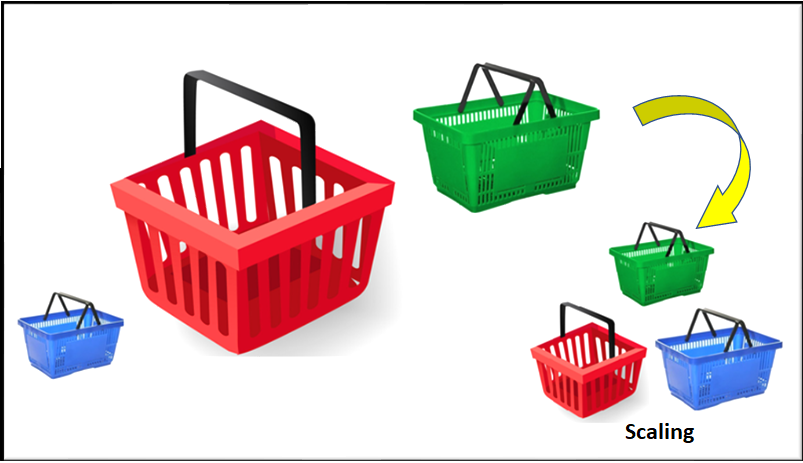

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('Social_Network_Ads.csv')

In [72]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.iloc[:,2:]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

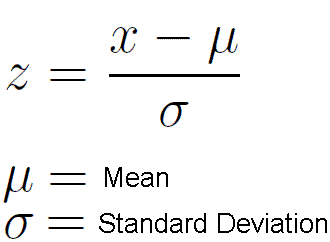

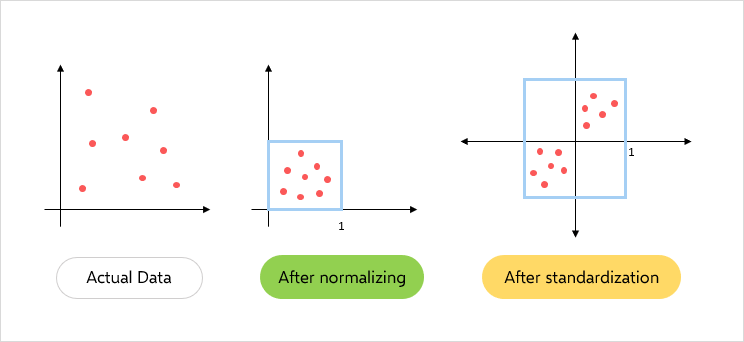

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [16]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


# Effects of scaling

In [22]:
import warnings
warnings.filterwarnings('ignore')

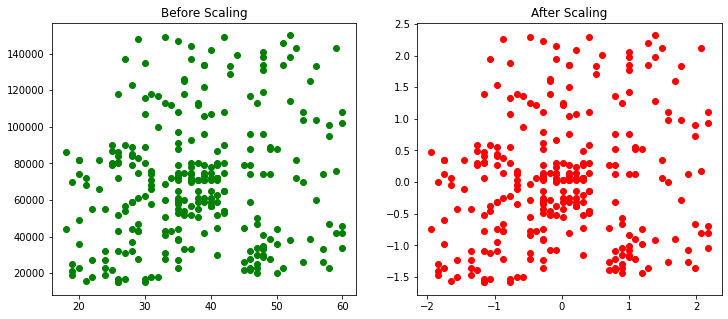

In [25]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize= (12,5))

ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'] , color = 'green')
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color = 'red')
ax2.set_title('After Scaling')

fig.show()

In [26]:
## Observation: Distribution of the data remains the same,, but only the scale has changed

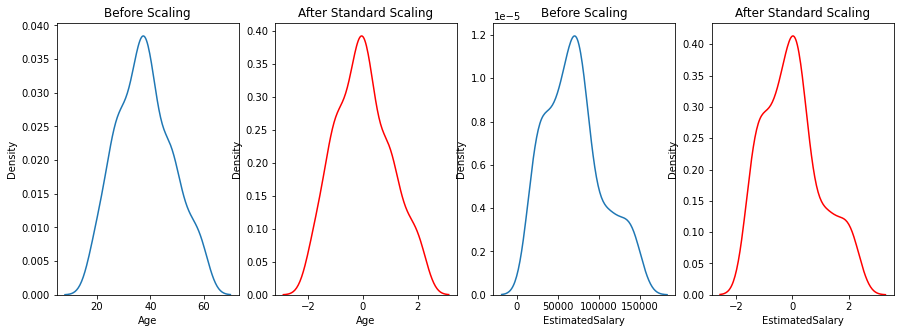

In [47]:
fig, (ax1, ax2, ax3 , ax4) = plt.subplots(ncols=4,figsize=(15, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,  color='red')


# before scaling
ax3.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax3)


# after scaling
ax4.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax4, color='red')
plt.show()

# Why scaling is important?



In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [49]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [57]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [58]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


# Effect of Outlier

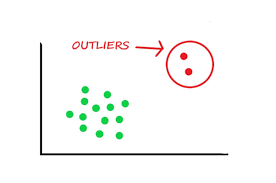


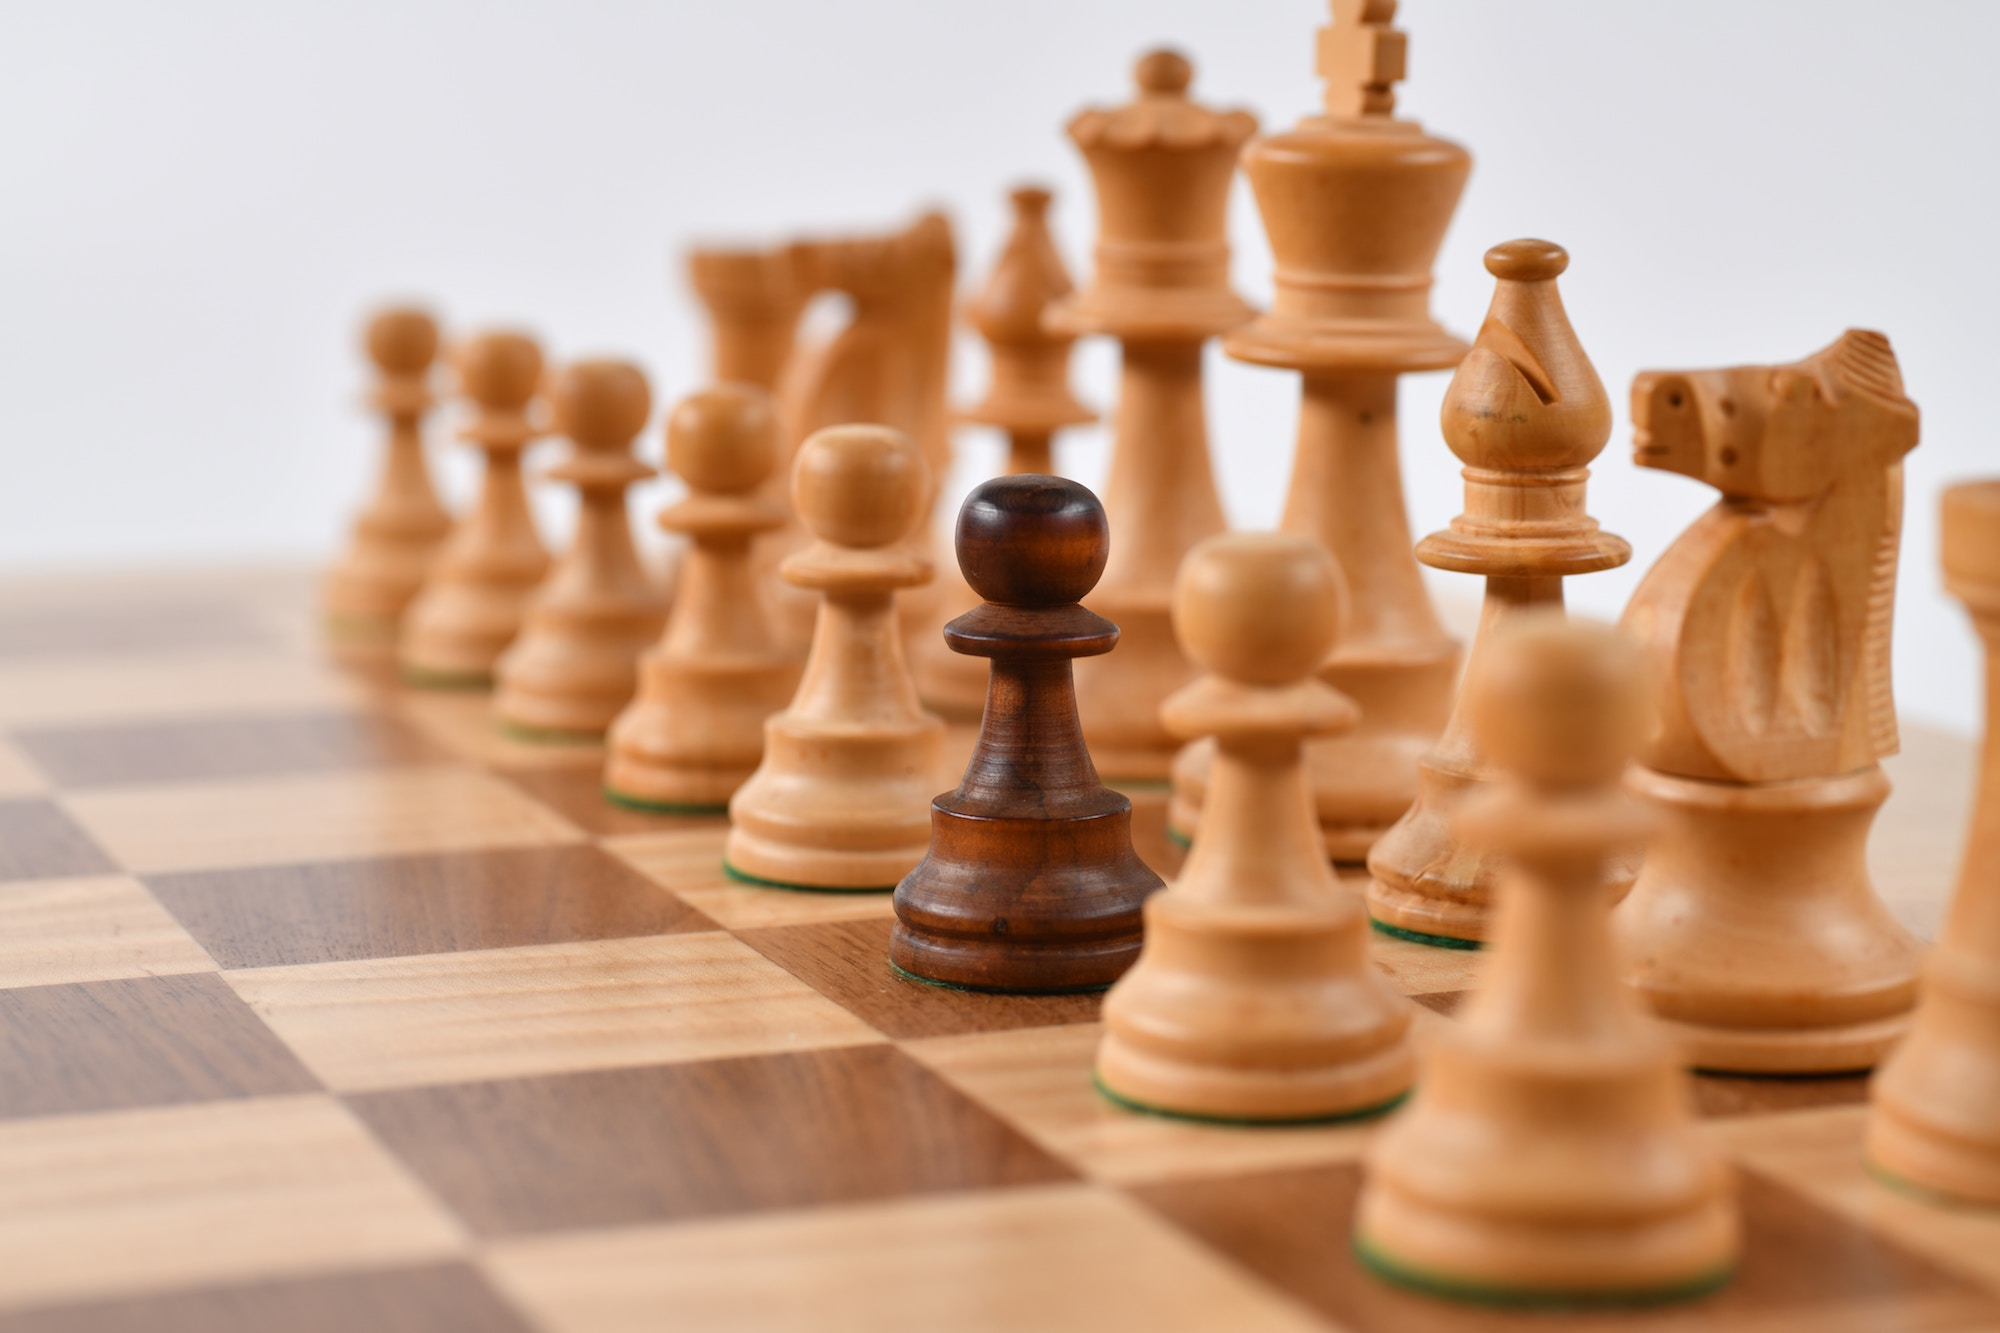

In [59]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [60]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


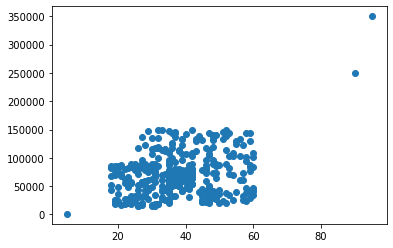

In [61]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

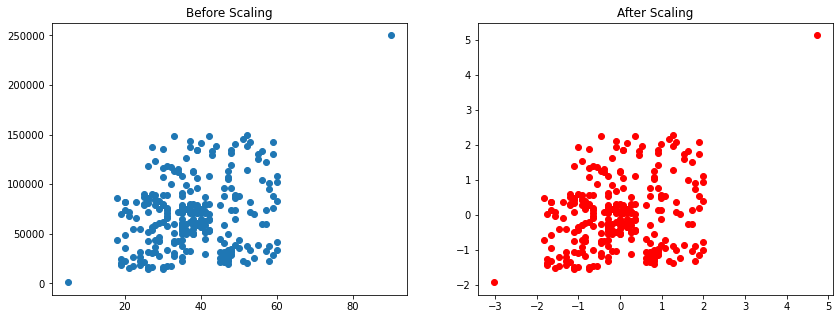

In [73]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title("Before Scaling")

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
plt.title("After Scaling")
plt.show()


# Observations

- Standardization or Z-Score Normalization is one of the feature scaling technique,it transforms features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
- The resulting data will have the mean of 0 and standard deviation of 1
- The scatter plots and distplots above shows that there will be no change in the distribution of data before and after applying the standard scaler, only the scale changes.
- The accuracy of Logistic regression increased significantly after scaling.
- But there was no effect on accuracy when the decision tree was used. 
- Outlier in the dataset will still remain as an outlier even after applying the standard scaling, we need to take care of the outlier by different methods.

# When to use Standardization 

- If we are using the algorithms where distances arecalculated Eg.KNN ,KMeans Clustering
- When we are using the algorithms where gradient descent is calculated like Linear Regression, Logistic regression , neural networks.
- Before applying PCA.